In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


In [2]:
bank_data = pd.read_csv('bank-additional-full.csv', sep=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_data.shape

(41188, 21)

In [4]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank_data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
bank_data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [8]:
# Replacing basic.4y, basic.6y, basic.9y with Basic value to reduce no of categories for education
bank_data['education'] = np.where(bank_data['education']=='basic.4y', 'Basic', bank_data['education'])
bank_data['education'] = np.where(bank_data['education']=='basic.6y', 'Basic', bank_data['education'])
bank_data['education'] = np.where(bank_data['education']=='basic.9y', 'Basic', bank_data['education'])

bank_data['y'] = np.where(bank_data['y']=='no', 0, bank_data['y'])
bank_data['y'] = np.where(bank_data['y']=='yes', 1, bank_data['y'])
bank_data['y'] = bank_data['y'].astype('int')

<AxesSubplot:xlabel='education', ylabel='count'>

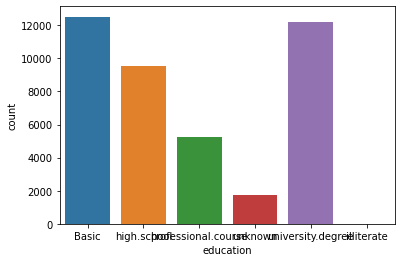

In [9]:
sns.countplot(bank_data['education'])

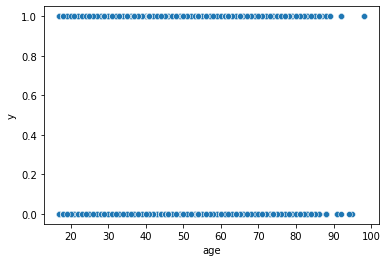

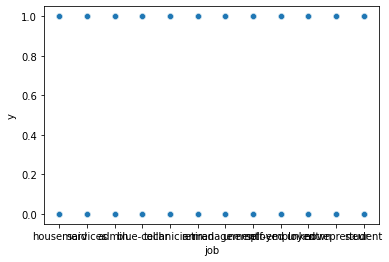

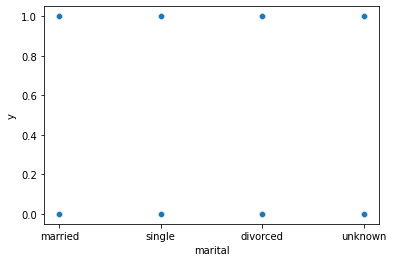

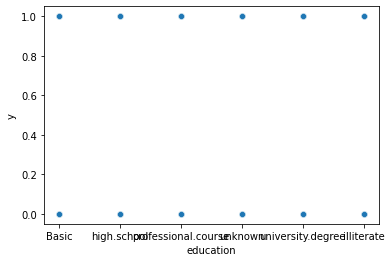

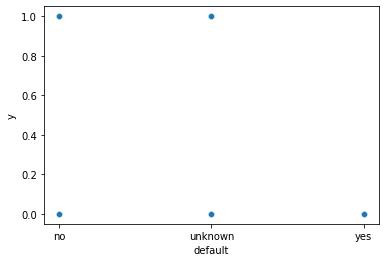

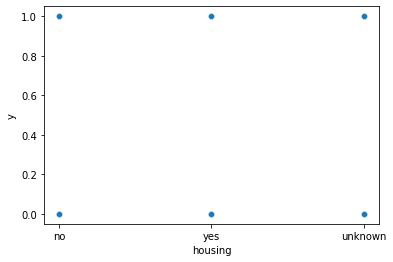

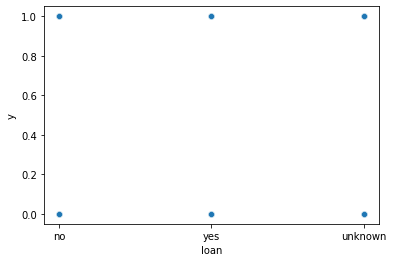

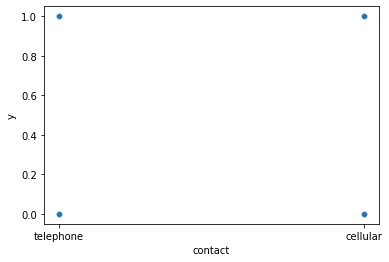

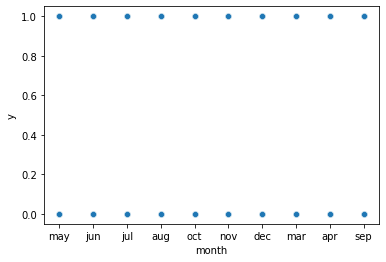

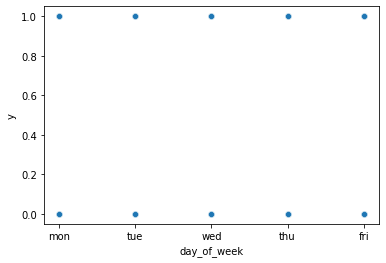

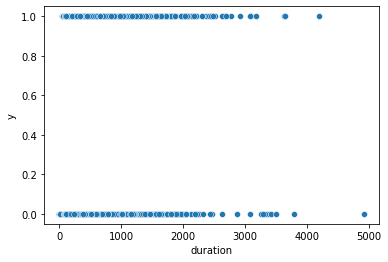

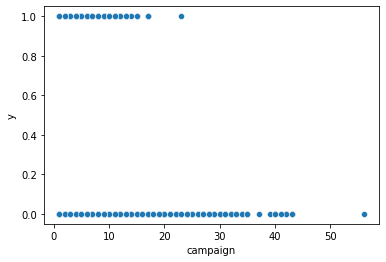

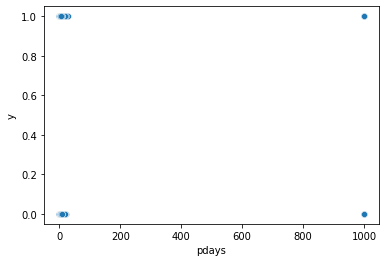

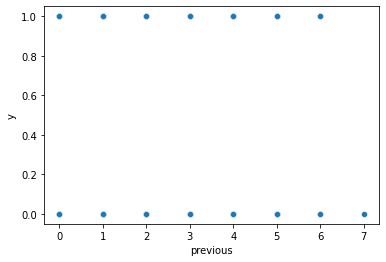

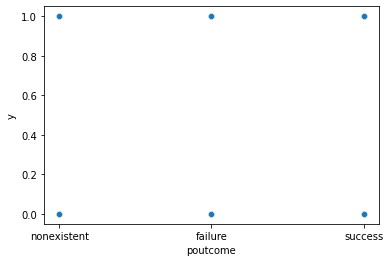

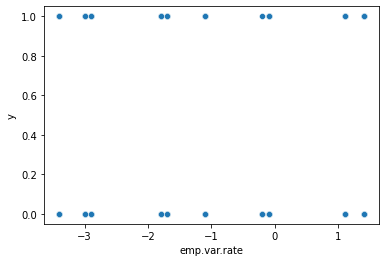

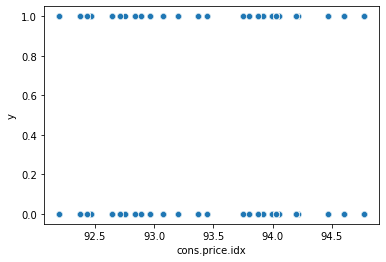

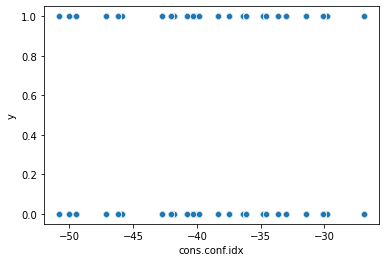

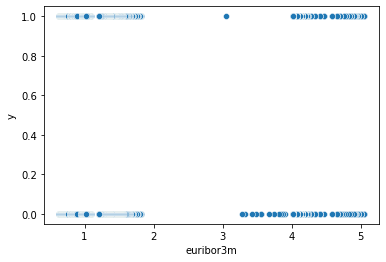

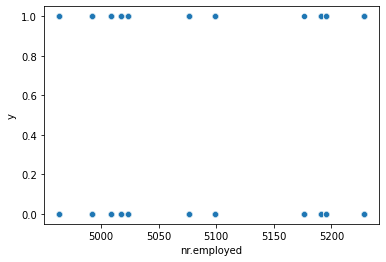

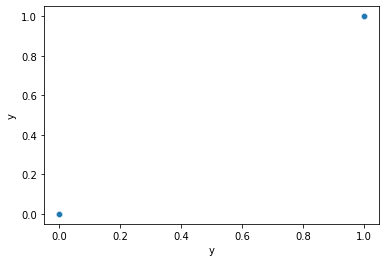

In [10]:
for col in bank_data.columns:
    sns.scatterplot(bank_data[col], bank_data['y'])
    plt.show()

In [11]:
no_of_subscriptions = len(bank_data[bank_data['y']==1])
no_of_non_subscriptions = len(bank_data[bank_data['y']==0])
print('Percentage of subscriptions {}'.format((no_of_subscriptions)/len(bank_data['y'])*100))
print('Percentage of non subscriptions {}'.format((no_of_non_subscriptions)/len(bank_data['y'])*100))

Percentage of subscriptions 11.265417111780131
Percentage of non subscriptions 88.73458288821988


In [12]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital','education','default','housing','loan','contact',
                                 'month','day_of_week','poutcome'], drop_first=True)
bank_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [13]:
bank_data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

# Split Data

In [14]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

no_of_y_train_subscriptions = len(y_train[y_train==1])
no_of_y_test_subscriptions = len(y_test[y_test==1])
no_of_y_train_non_subscriptions = len(y_train[y_train==0])
no_of_y_test_non_subscriptions = len(y_test[y_test==0])

print('y train Percentage of subscriptions {}'.format((no_of_y_train_subscriptions)/len(y_train)*100))
print('y train Percentage of non subscriptions {}'.format((no_of_y_train_non_subscriptions)/len(y_train)*100))

print('y test Percentage of subscriptions {}'.format((no_of_y_test_subscriptions)/len(y_test)*100))
print('y test Percentage of non subscriptions {}'.format((no_of_y_test_non_subscriptions)/len(y_test)*100))

y train Percentage of subscriptions 11.192813291249003
y train Percentage of non subscriptions 88.80718670875099
y test Percentage of subscriptions 11.43481427530954
y test Percentage of non subscriptions 88.56518572469045


In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix as cm

confusion_matrix = cm(y_test, y_predict)
confusion_matrix

array([[10666,   278],
       [  847,   566]])

<AxesSubplot:>

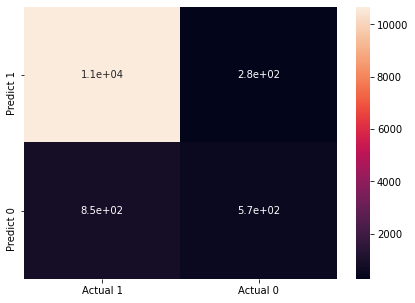

In [17]:
cm_df = pd.DataFrame(confusion_matrix, index=['Predict 1', 'Predict 0'], columns=['Actual 1', 'Actual 0'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True)

# Compute precision, recall, F-measure and support

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.67      0.40      0.50      1413

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



# ROC Curve

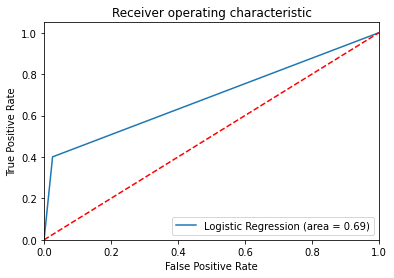

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

model_roc_auc = roc_auc_score(y_test, y_predict)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
thresholds, fpr, tpr
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

# Using SMOTE and Feature Elimination Techniques

In [20]:
bank_data = pd.read_csv('bank-additional-full.csv', sep=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Replacing basic.4y, basic.6y, basic.9y with Basic value to reduce no of categories for education
bank_data['education'] = np.where(bank_data['education']=='basic.4y', 'Basic', bank_data['education'])
bank_data['education'] = np.where(bank_data['education']=='basic.6y', 'Basic', bank_data['education'])
bank_data['education'] = np.where(bank_data['education']=='basic.9y', 'Basic', bank_data['education'])

bank_data['y'] = np.where(bank_data['y']=='no', 0, bank_data['y'])
bank_data['y'] = np.where(bank_data['y']=='yes', 1, bank_data['y'])
bank_data['y'] = bank_data['y'].astype('int')

In [22]:
no_of_subscriptions = len(bank_data[bank_data['y']==1])
no_of_non_subscriptions = len(bank_data[bank_data['y']==0])
print('Percentage of subscriptions {}'.format((no_of_subscriptions)/len(bank_data['y'])*100))
print('Percentage of non subscriptions {}'.format((no_of_non_subscriptions)/len(bank_data['y'])*100))

Percentage of subscriptions 11.265417111780131
Percentage of non subscriptions 88.73458288821988


In [23]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital','education','default','housing','loan','contact',
                                 'month','day_of_week','poutcome'], drop_first=True)
bank_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


# Split the data

In [24]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

no_of_y_train_subscriptions = len(y_train[y_train==1])
no_of_y_test_subscriptions = len(y_test[y_test==1])
no_of_y_train_non_subscriptions = len(y_train[y_train==0])
no_of_y_test_non_subscriptions = len(y_test[y_test==0])

print('y train Percentage of subscriptions {}'.format((no_of_y_train_subscriptions)/len(y_train)*100))
print('y train Percentage of non subscriptions {}'.format((no_of_y_train_non_subscriptions)/len(y_train)*100))

print('y test Percentage of subscriptions {}'.format((no_of_y_test_subscriptions)/len(y_test)*100))
print('y test Percentage of non subscriptions {}'.format((no_of_y_test_non_subscriptions)/len(y_test)*100))

y train Percentage of subscriptions 11.192813291249003
y train Percentage of non subscriptions 88.80718670875099
y test Percentage of subscriptions 11.43481427530954
y test Percentage of non subscriptions 88.56518572469045


# We have lot of data imbalance in the class section, which means there are only 11% of the people who subscribed for the program and 88.8% of the people are non subscribers, this could lead to a biased classficcation hence we need to use the techniques like Under/Over samplings. One of the popular technique is SMOTE (Synthetic Minority Oversampling Technique)

In [25]:
import sys

!{sys.executable} -m pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

over_sampling = SMOTE(random_state=0)
X_train_columns = X_train.columns

# print('X_train sample size before over sampling {}'.format(len(X_train)))

print('y_train sample size before over sampling {}'.format(len(y_train)))

os_data_X, os_data_y = over_sampling.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(os_data_X, columns=X_train_columns)
os_data_y = pd.DataFrame(os_data_y, columns=['y'])

no_of_y_train_subscriptions_post_SMOTE = len(os_data_y[os_data_y['y']==1])
no_of_y_train_non_subscriptions_post_SMOTE = len(os_data_y[os_data_y['y']==0])

print('X_train sample size after over sampling {}'.format(len(os_data_X)))

print('y_train sample size after over sampling {}'.format(len(os_data_y)))


print('y train Percentage of subscriptions post SMOTE {}'.format((no_of_y_train_subscriptions_post_SMOTE)/len(os_data_y)*100))
print('y train Percentage of non subscriptions post SMOTE {}'.format((no_of_y_train_non_subscriptions_post_SMOTE)/len(os_data_y)*100))

y_train sample size before over sampling 28831
X_train sample size after over sampling 51208
y_train sample size after over sampling 51208
y train Percentage of subscriptions post SMOTE 50.0
y train Percentage of non subscriptions post SMOTE 50.0


# Recursive Feature Elimination

In [27]:
bank_data_final_vars=bank_data.columns.values.tolist()
len(bank_data_final_vars)

52

In [28]:
from sklearn.feature_selection import RFE
log_reg = LogisticRegression()
rfe = RFE(log_reg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe.support_[rfe.support_==True])

[False False False False False False False False False False  True  True
  True False False  True  True False False  True  True False False False
  True False  True  True  True False False False False False False  True
  True False  True False False False  True False False  True  True  True
  True False  True]
[26 28 21 30 17 19 22 23 25 24  1  1  1  3 29  1  1 18  4  1  1  7  8 27
  1 31  1  1  1  5 32  9 13 12 10  1  1 15  1  6 20  2  1 14 11  1  1  1
  1 16  1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [29]:
indexes = np.where(rfe.support_==True)[0].astype(int)
cols = np.array(bank_data_final_vars)[indexes][1:]
cols

array(['job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_self-employed', 'job_technician', 'job_unemployed',
       'marital_unknown', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'loan_yes', 'contact_telephone', 'month_dec', 'month_may',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'poutcome_nonexistent'], dtype='<U29')

In [30]:
X_train = os_data_X[cols]
y_train = os_data_y['y']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
X_test = X_test[cols]
y_pred = logreg.predict(X_test)
print(y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
thresholds, fpr, tpr

[0 0 0 ... 1 1 0]
Accuracy of logistic regression classifier on test set: 0.76


(array([2, 1, 0]),
 array([0.        , 0.18941886, 1.        ]),
 array([0.        , 0.37650389, 1.        ]))

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8871 2073]
 [ 881  532]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     10944
           1       0.20      0.38      0.26      1413

    accuracy                           0.76     12357
   macro avg       0.56      0.59      0.56     12357
weighted avg       0.83      0.76      0.79     12357

